# Flight Price Prediction- CASE STUDY


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [3]:
train_data = pd.read_excel(r"Flight_Data.xlsx")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [10]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [11]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [14]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [19]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [20]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [22]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

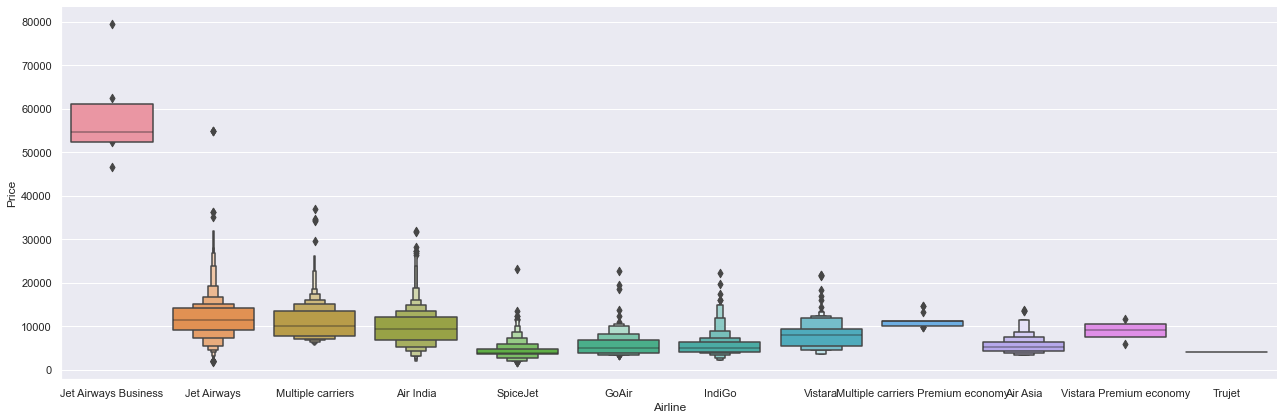

In [23]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [24]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

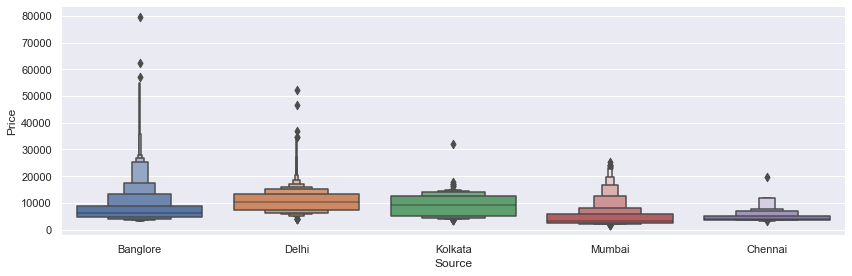

In [26]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [27]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [33]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [34]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [35]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [37]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
data_train.shape

(10682, 30)

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [44]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [39]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

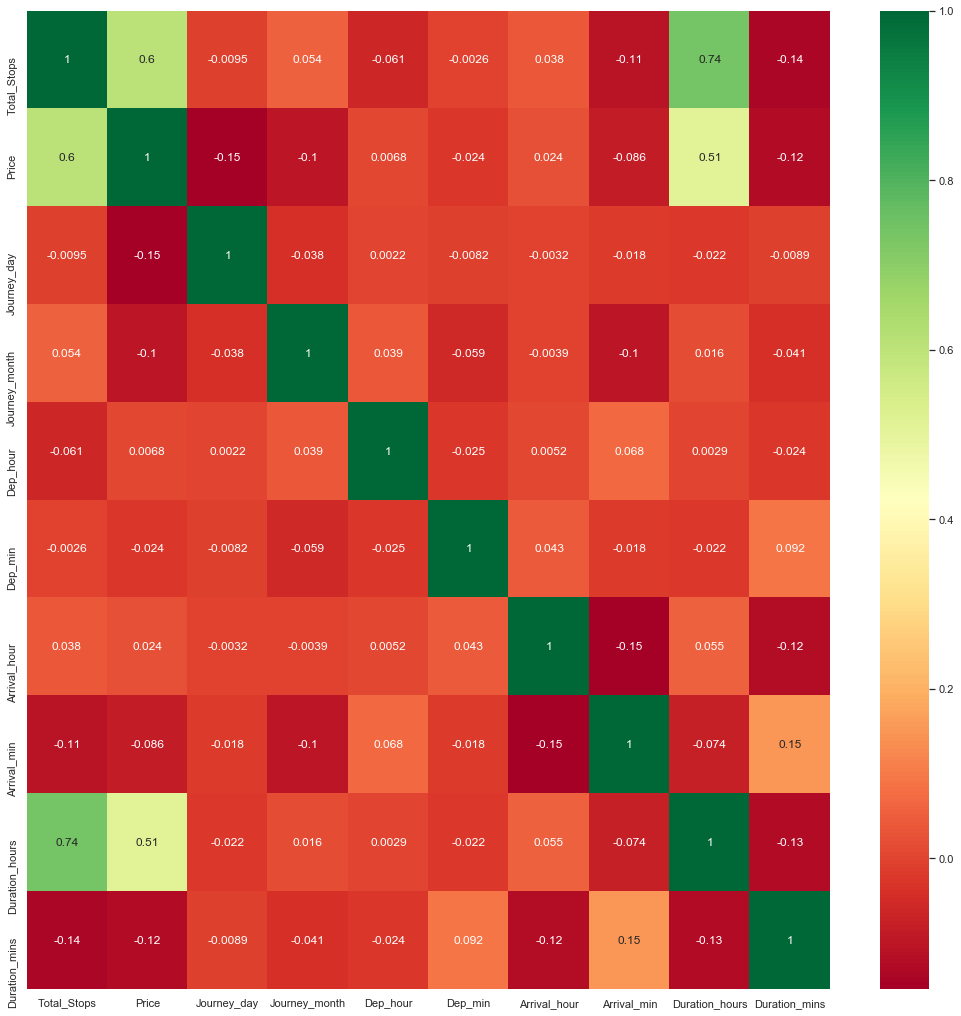

In [47]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [41]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [42]:
print(selection.feature_importances_)

[1.97032451e-01 1.43794786e-01 5.25303744e-02 2.36184704e-02
 2.14368332e-02 2.82449910e-02 1.85163591e-02 1.40059984e-01
 1.83510247e-02 1.06206723e-02 1.94937041e-03 2.00137844e-02
 1.41333272e-01 6.79654437e-02 1.69092382e-02 8.16011248e-04
 3.03355187e-03 1.18664472e-04 4.82308034e-03 8.23423411e-05
 4.91490965e-04 1.11468736e-02 3.33146071e-03 6.45706010e-03
 1.56090622e-02 1.86387516e-02 7.68761015e-03 5.02396437e-04
 2.48845886e-02]


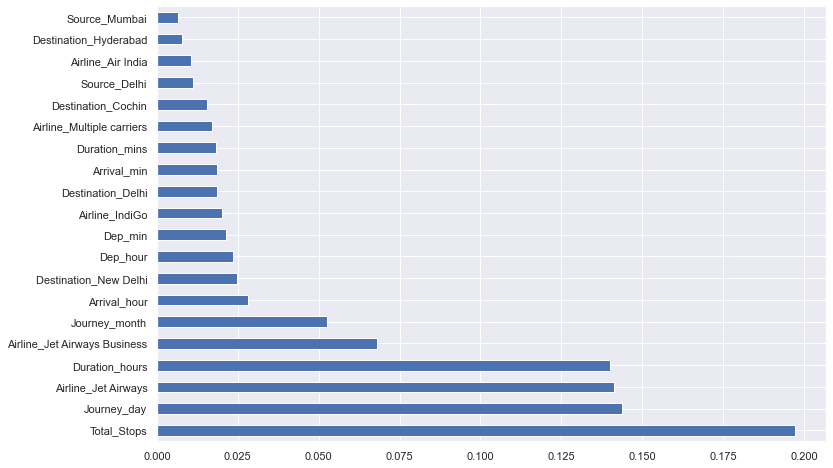

In [43]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# MODEL SELECTION

# Creating the Model - Choosing the Best Model

# Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
scores=[]
for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.6345097401007789
At random state 0,the testing accuracy is :-0.5897613068908487


At random state 1,the training accuracy is :-0.6284963534837915
At random state 1,the testing accuracy is :-0.605686642811051


At random state 2,the training accuracy is :-0.6298854957958571
At random state 2,the testing accuracy is :-0.6024142307021293


At random state 3,the training accuracy is :-0.6270949586090333
At random state 3,the testing accuracy is :-0.6107242760087814


At random state 4,the training accuracy is :-0.6237600500172336
At random state 4,the testing accuracy is :-0.6214124683098589


At random state 5,the training accuracy is :-0.6131932411453256
At random state 5,the testing accuracy is :-0.6455872929798345


At random state 6,the training accuracy is :-0.6220623324624357
At random state 6,the testing accuracy is :-0.6259883346629433


At random state 7,the training accuracy is :-0.6179545207287023
At random state 7,the testing accu

At random state 67,the training accuracy is :-0.6251872747721787
At random state 67,the testing accuracy is :-0.6159897051713162


At random state 68,the training accuracy is :-0.6232555787513119
At random state 68,the testing accuracy is :-0.6228234313294734


At random state 69,the training accuracy is :-0.6157972972588428
At random state 69,the testing accuracy is :-0.6436472182512465


At random state 70,the training accuracy is :-0.63025854754866
At random state 70,the testing accuracy is :-0.5984913871693096


At random state 71,the training accuracy is :-0.6138881158604186
At random state 71,the testing accuracy is :-0.6514783351217944


At random state 72,the training accuracy is :-0.6295832294171997
At random state 72,the testing accuracy is :-0.6012466282147175


At random state 73,the training accuracy is :-0.6205631380344384
At random state 73,the testing accuracy is :-0.6289821855964424


At random state 74,the training accuracy is :-0.619536187516023
At random state 74,th

At random state 132,the training accuracy is :-0.6233050671196503
At random state 132,the testing accuracy is :-0.6201972777725935


At random state 133,the training accuracy is :-0.6211140515029547
At random state 133,the testing accuracy is :-0.6284317416464889


At random state 134,the training accuracy is :-0.6106745040474628
At random state 134,the testing accuracy is :-0.6591426731026993


At random state 135,the training accuracy is :-0.621190730686301
At random state 135,the testing accuracy is :-0.6299091410870195


At random state 136,the training accuracy is :-0.6223481087381605
At random state 136,the testing accuracy is :-0.6261561694979132


At random state 137,the training accuracy is :-0.6266724479942637
At random state 137,the testing accuracy is :-0.6106618686798053


At random state 138,the training accuracy is :-0.6240845914475754
At random state 138,the testing accuracy is :-0.6166371790352891


At random state 139,the training accuracy is :-0.6227100151881869
At r

At random state 203,the testing accuracy is :-0.5865951855621365


At random state 204,the training accuracy is :-0.6334798335101766
At random state 204,the testing accuracy is :-0.5969634958840471


At random state 205,the training accuracy is :-0.617833486390711
At random state 205,the testing accuracy is :-0.6346557859415898


At random state 206,the training accuracy is :-0.6193097194318895
At random state 206,the testing accuracy is :-0.6356244431860596


At random state 207,the training accuracy is :-0.628961799831315
At random state 207,the testing accuracy is :-0.6059513385948236


At random state 208,the training accuracy is :-0.632395171457927
At random state 208,the testing accuracy is :-0.59620493380937


At random state 209,the training accuracy is :-0.6217079147007956
At random state 209,the testing accuracy is :-0.6283365681771487


At random state 210,the training accuracy is :-0.6180029781333302
At random state 210,the testing accuracy is :-0.6356671927295592


At rand

At random state 270,the training accuracy is :-0.639431522692214
At random state 270,the testing accuracy is :-0.5763176641910119


At random state 271,the training accuracy is :-0.6276511404383169
At random state 271,the testing accuracy is :-0.6094702490104065


At random state 272,the training accuracy is :-0.6230059759334561
At random state 272,the testing accuracy is :-0.6237561953713571


At random state 273,the training accuracy is :-0.6162794222539016
At random state 273,the testing accuracy is :-0.6389325742304715


At random state 274,the training accuracy is :-0.6320320902641672
At random state 274,the testing accuracy is :-0.5944138407296713


At random state 275,the training accuracy is :-0.6152667414993076
At random state 275,the testing accuracy is :-0.64766369321358


At random state 276,the training accuracy is :-0.6347121774586377
At random state 276,the testing accuracy is :-0.5821211992514503


At random state 277,the training accuracy is :-0.6125921945116473
At ran

At random state 344,the testing accuracy is :-0.632665379119355


At random state 345,the training accuracy is :-0.6226251579848434
At random state 345,the testing accuracy is :-0.6208117854906174


At random state 346,the training accuracy is :-0.6211975834668956
At random state 346,the testing accuracy is :-0.6290639948357866


At random state 347,the training accuracy is :-0.6245798251905892
At random state 347,the testing accuracy is :-0.6193508208924321


At random state 348,the training accuracy is :-0.6195562291585051
At random state 348,the testing accuracy is :-0.6340718455453411


At random state 349,the training accuracy is :-0.6273218298410029
At random state 349,the testing accuracy is :-0.6098862020393703


At random state 350,the training accuracy is :-0.6247553212942829
At random state 350,the testing accuracy is :-0.617547911438836


At random state 351,the training accuracy is :-0.6246477775413528
At random state 351,the testing accuracy is :-0.6184208823331079


At r

At random state 407,the testing accuracy is :-0.6007295422555142


At random state 408,the training accuracy is :-0.6204191122490104
At random state 408,the testing accuracy is :-0.6323222284970261


At random state 409,the training accuracy is :-0.6095537444794388
At random state 409,the testing accuracy is :-0.6631379656732233


At random state 410,the training accuracy is :-0.6243725902776336
At random state 410,the testing accuracy is :-0.6186028523710119


At random state 411,the training accuracy is :-0.6378519266539562
At random state 411,the testing accuracy is :-0.5772676326825323


At random state 412,the training accuracy is :-0.6285531494002299
At random state 412,the testing accuracy is :-0.6043024031652351


At random state 413,the training accuracy is :-0.618589959491654
At random state 413,the testing accuracy is :-0.6359439635927998


At random state 414,the training accuracy is :-0.6263796986737011
At random state 414,the testing accuracy is :-0.6132442116424899


At 

At random state 470,the testing accuracy is :-0.6320010063012544


At random state 471,the training accuracy is :-0.6192745170843139
At random state 471,the testing accuracy is :-0.6348346753766214


At random state 472,the training accuracy is :-0.6350624307787451
At random state 472,the testing accuracy is :-0.5847777208513623


At random state 473,the training accuracy is :-0.6318341027155822
At random state 473,the testing accuracy is :-0.5918671062063833


At random state 474,the training accuracy is :-0.6230045551660024
At random state 474,the testing accuracy is :-0.6230161559458591


At random state 475,the training accuracy is :-0.612761976629743
At random state 475,the testing accuracy is :-0.65120081452939


At random state 476,the training accuracy is :-0.640981205557761
At random state 476,the testing accuracy is :-0.5703278567001513


At random state 477,the training accuracy is :-0.6310568227350231
At random state 477,the testing accuracy is :-0.5946312174263892


At ran

At random state 544,the training accuracy is :-0.6281105641899787
At random state 544,the testing accuracy is :-0.6088505812005283


At random state 545,the training accuracy is :-0.6333739761369218
At random state 545,the testing accuracy is :-0.5904958971929427


At random state 546,the training accuracy is :-0.6196644543404352
At random state 546,the testing accuracy is :-0.6346278814872757


At random state 547,the training accuracy is :-0.6267850724477263
At random state 547,the testing accuracy is :-0.6083661273614851


At random state 548,the training accuracy is :-0.6332792709459343
At random state 548,the testing accuracy is :-0.5919926807738114


At random state 549,the training accuracy is :-0.6418866157567882
At random state 549,the testing accuracy is :-0.5678543936220528


At random state 550,the training accuracy is :-0.6328922934713175
At random state 550,the testing accuracy is :-0.5922462999958822


At random state 551,the training accuracy is :-0.6226834973888409
At 

At random state 617,the testing accuracy is :-0.62582319136811


At random state 618,the training accuracy is :-0.6111871228705023
At random state 618,the testing accuracy is :-0.6578832293090491


At random state 619,the training accuracy is :-0.6230368516392961
At random state 619,the testing accuracy is :-0.6221818950670517


At random state 620,the training accuracy is :-0.6157201289057612
At random state 620,the testing accuracy is :-0.6410463788858252


At random state 621,the training accuracy is :-0.6338775014431917
At random state 621,the testing accuracy is :-0.5922588600893959


At random state 622,the training accuracy is :-0.6219452895382458
At random state 622,the testing accuracy is :-0.6273607417636593


At random state 623,the training accuracy is :-0.6225196926677706
At random state 623,the testing accuracy is :-0.624669278626836


At random state 624,the training accuracy is :-0.6197815960813287
At random state 624,the testing accuracy is :-0.6295953398914111


At ra

At random state 689,the testing accuracy is :-0.6210710746218377


At random state 690,the training accuracy is :-0.6318671880476447
At random state 690,the testing accuracy is :-0.5987758161582297


At random state 691,the training accuracy is :-0.6286594114017365
At random state 691,the testing accuracy is :-0.6069428466061609


At random state 692,the training accuracy is :-0.6293379826634671
At random state 692,the testing accuracy is :-0.6009101657312579


At random state 693,the training accuracy is :-0.6274867756037711
At random state 693,the testing accuracy is :-0.6090153976479116


At random state 694,the training accuracy is :-0.6215089077914757
At random state 694,the testing accuracy is :-0.6275247442024035


At random state 695,the training accuracy is :-0.6336246624023008
At random state 695,the testing accuracy is :-0.5910012758100576


At random state 696,the training accuracy is :-0.6349498790277655
At random state 696,the testing accuracy is :-0.5905890439127701


At

At random state 758,the testing accuracy is :-0.608719896475019


At random state 759,the training accuracy is :-0.6250224241303173
At random state 759,the testing accuracy is :-0.6175551553390318


At random state 760,the training accuracy is :-0.6157823757417007
At random state 760,the testing accuracy is :-0.6409905102749748


At random state 761,the training accuracy is :-0.6320318856644169
At random state 761,the testing accuracy is :-0.5933099874416101


At random state 762,the training accuracy is :-0.6281733706718388
At random state 762,the testing accuracy is :-0.6085461417628903


At random state 763,the training accuracy is :-0.60703576928572
At random state 763,the testing accuracy is :-0.6575201058342428


At random state 764,the training accuracy is :-0.6269554447760579
At random state 764,the testing accuracy is :-0.6051902580851771


At random state 765,the training accuracy is :-0.6200630936614842
At random state 765,the testing accuracy is :-0.6322951493913773


At ra

At random state 828,the testing accuracy is :-0.5738229460205054


At random state 829,the training accuracy is :-0.6282380336178093
At random state 829,the testing accuracy is :-0.6054742244601424


At random state 830,the training accuracy is :-0.6211634554968228
At random state 830,the testing accuracy is :-0.6215918788432115


At random state 831,the training accuracy is :-0.6263972578640691
At random state 831,the testing accuracy is :-0.6130863222898493


At random state 832,the training accuracy is :-0.6249163053278777
At random state 832,the testing accuracy is :-0.6172687336514574


At random state 833,the training accuracy is :-0.6210033308421126
At random state 833,the testing accuracy is :-0.6273612642738284


At random state 834,the training accuracy is :-0.6236200968595436
At random state 834,the testing accuracy is :-0.619815429524013


At random state 835,the training accuracy is :-0.6256279465362936
At random state 835,the testing accuracy is :-0.6145309159926508


At 

At random state 899,the testing accuracy is :-0.6200235173772461


At random state 900,the training accuracy is :-0.631601333733439
At random state 900,the testing accuracy is :-0.5965448843786084


At random state 901,the training accuracy is :-0.6280890450767753
At random state 901,the testing accuracy is :-0.6076284427299017


At random state 902,the training accuracy is :-0.6215395959977992
At random state 902,the testing accuracy is :-0.6258754865516971


At random state 903,the training accuracy is :-0.6290409393943953
At random state 903,the testing accuracy is :-0.6029756524336223


At random state 904,the training accuracy is :-0.6174384450264045
At random state 904,the testing accuracy is :-0.6373688120900868


At random state 905,the training accuracy is :-0.628561048254715
At random state 905,the testing accuracy is :-0.6073852954075635


At random state 906,the training accuracy is :-0.6235203873842416
At random state 906,the testing accuracy is :-0.6212346881695842


At r

At random state 966,the testing accuracy is :-0.6140208951755706


At random state 967,the training accuracy is :-0.6331778343268925
At random state 967,the testing accuracy is :-0.593856974144801


At random state 968,the training accuracy is :-0.61413805915409
At random state 968,the testing accuracy is :-0.6463245408336116


At random state 969,the training accuracy is :-0.6240653674550114
At random state 969,the testing accuracy is :-0.6211939821041


At random state 970,the training accuracy is :-0.6215497384748789
At random state 970,the testing accuracy is :-0.6290136389531775


At random state 971,the training accuracy is :-0.6187772343740647
At random state 971,the testing accuracy is :-0.6337098627981559


At random state 972,the training accuracy is :-0.6119116549177576
At random state 972,the testing accuracy is :-0.6552076373782556


At random state 973,the training accuracy is :-0.6267267975926657
At random state 973,the testing accuracy is :-0.6105666240890382


At rando

### Finding the highest using argmax

In [47]:
np.argmax(scores)

224

In [48]:
scores[np.argmax(scores)]

0.679551129054491

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 224)

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
pred_test=lr.predict(X_test)

In [53]:
print(r2_score(y_test,pred_test))

0.679551129054491


# Cross-Validation of the model

In [54]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is 0.6183722734703163 and accuracy score for training is -0.6476730474528358and the accuracy for testing is 0.679551129054491


At cross fold3 the cv score is 0.6190349040445325 and accuracy score for training is -0.6476730474528358and the accuracy for testing is 0.679551129054491


At cross fold4 the cv score is 0.6213062350335223 and accuracy score for training is -0.6476730474528358and the accuracy for testing is 0.679551129054491


At cross fold5 the cv score is 0.6199027318916419 and accuracy score for training is -0.6476730474528358and the accuracy for testing is 0.679551129054491


At cross fold6 the cv score is 0.6205586532825998 and accuracy score for training is -0.6476730474528358and the accuracy for testing is 0.679551129054491


At cross fold7 the cv score is 0.6195867852859553 and accuracy score for training is -0.6476730474528358and the accuracy for testing is 0.679551129054491


At cross fold8 the cv score is 0.6199893507866636 and accuracy s

# Plotting the linear Regression graph with actual and predicted values comparison

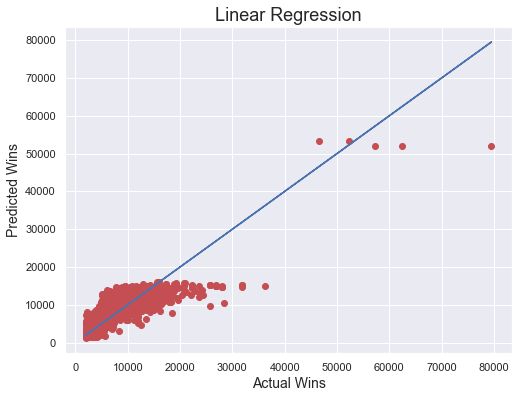

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization of the Linear Model

In [56]:
from sklearn.model_selection import GridSearchCV #to select the pest parameters for hyperparameter tuning
from sklearn.model_selection import cross_val_score #to check the difference from the earlier score without hyper parameter tuning

In [57]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,15))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


# Final model training for Linear Regression

In [58]:
ls = Lasso(alpha= 0.1, random_state= 0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

59.929973516550675

# Checking MSE,RMSE score 

In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 1971.9149809559103
MSE: 7832335.979313649
RMSE: 2798.6310902499545


# Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
pred_test =dt.predict(X_test)
dfs = r2_score(y_test,pred_test)
print('R2 Score :',dfs*100)

dfscore = cross_val_score(dt,X,y,cv=9)
dfc =dfscore.mean()
print('Cross Val Score :',dfc*100)


R2 Score : 67.28187183479127
Cross Val Score : 71.84741717126788


In [61]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 1401.5498252839136
MSE: 7996887.979291256
RMSE: 2827.8769384984303


# K- Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred_test =knn.predict(X_test)
knns = r2_score(y_test,pred_test)
print('R2 Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=9)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)


R2 Score : 52.83591953559734
Cross Val Score : 59.03021303135111


In [63]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 1933.4228378884313
MSE: 11527733.683773868
RMSE: 3395.2516377691163


# Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision =rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 77.8130562335358
Cross Val Score : 81.06537353777819


In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 1933.4228378884313
MSE: 11527733.683773868
RMSE: 3395.2516377691163


# SVR

In [67]:
from sklearn.svm import SVR
svr= SVR()

svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_decision =svr.predict(X_test)

svrs = r2_score(y_test,pred_decision)
print('R2 Score :',svrs*100)

svrscore = cross_val_score(svr,X,y,cv=2)
svrc =svrscore.mean()
print('Cross Val Score :',svrc*100)


R2 Score : 0.15235660771393267
Cross Val Score : -0.6282878815062787


In [68]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 3591.438223880594
MSE: 24404526.297240835
RMSE: 4940.093753891806


# Xgboost Regressor

In [69]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)
pred_decision =xgb.predict(X_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=9)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)



R2 Score : 85.73561497458645
Cross Val Score : 84.67915379336922


In [70]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 1141.659433699779
MSE: 3486467.458215119
RMSE: 1867.2084667264978


## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  18.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [67]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [69]:
prediction = rf_random.predict(X_test)

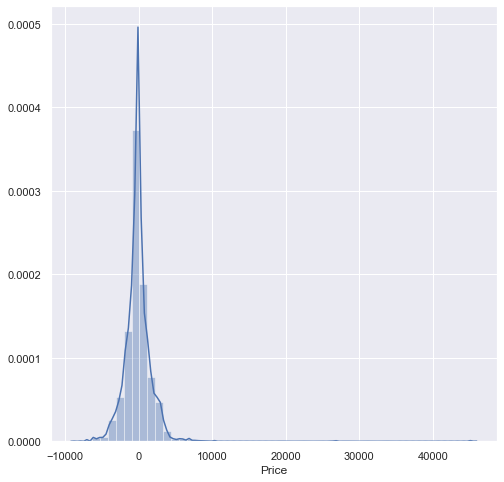

In [70]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

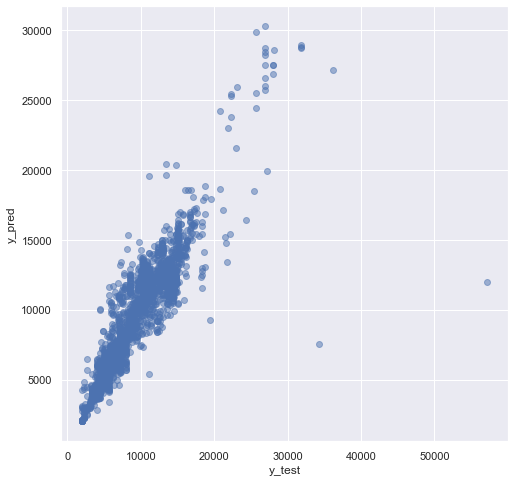

In [71]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [72]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 1165.606162629916
MSE: 4062650.6911608884
RMSE: 2015.6018186042818


---

## Save the model to reuse it again

In [62]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [63]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [64]:
y_prediction = forest.predict(X_test)

In [65]:
metrics.r2_score(y_test, pred_decision)

0.8117443234361064

---

# Best model is XGB Regressor with 85% score 